# 10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity

## load tha data

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genextreme, genpareto

# Load dataset
df = pd.read_csv('DFF.csv')

# Convert date column to datetime
df['observation_date'] = pd.to_datetime(df['observation_date'])

# Handle missing values (forward-fill method)
df['DFF'] = df['DFF'].ffill()


## Handle missing values

In [21]:
df['rate_change'] = df['DFF'].diff()
df = df.dropna()  # Remove NaN from first diff()


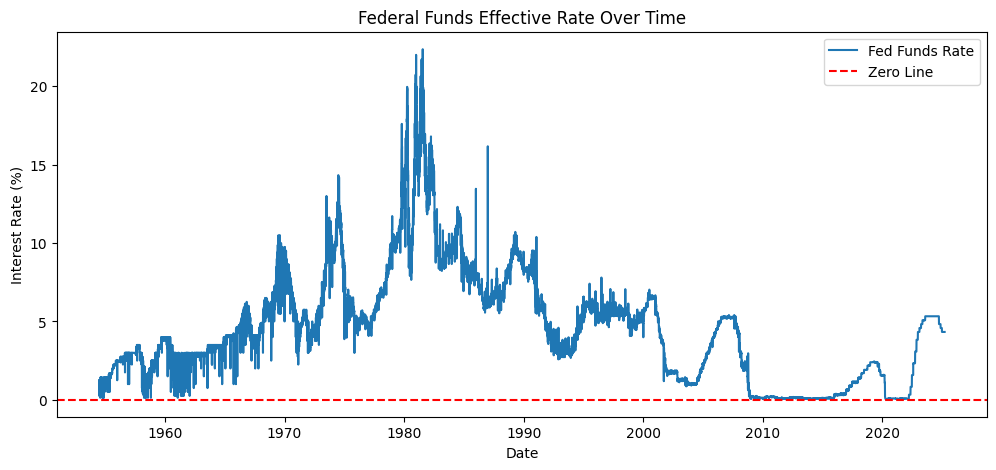

In [22]:
plt.figure(figsize=(12,5))
plt.plot(df['observation_date'], df['DFF'], label='Fed Funds Rate')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Line')
plt.title('Federal Funds Effective Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Interest Rate (%)')
plt.legend()
plt.show()


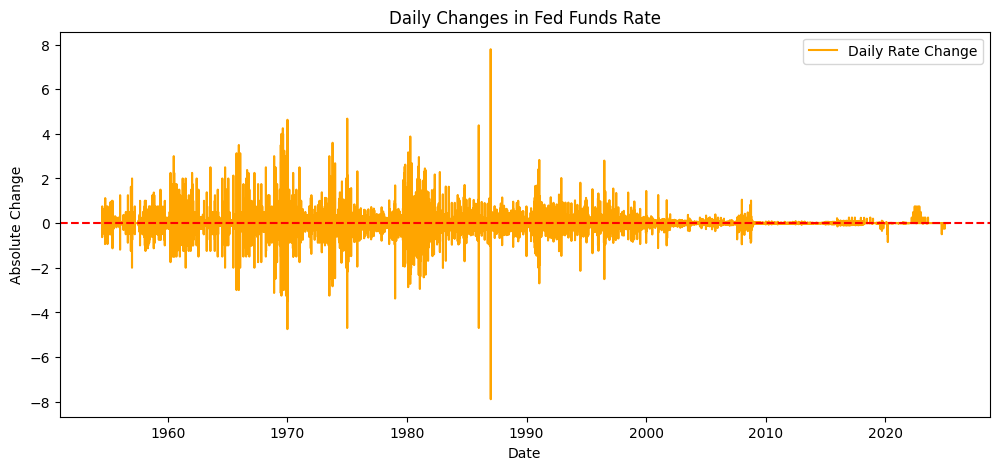

In [23]:
plt.figure(figsize=(12,5))
plt.plot(df['observation_date'], df['rate_change'], label='Daily Rate Change', color='orange')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Daily Changes in Fed Funds Rate')
plt.xlabel('Date')
plt.ylabel('Absolute Change')
plt.legend()
plt.show()


In [24]:
df['year_month'] = df['observation_date'].dt.to_period('M')
block_maxima = df.groupby('year_month')['rate_change'].max()

# Fit GEV Distribution
gev_params = genextreme.fit(block_maxima)
print("GEV Parameters (Shape, Location, Scale):", gev_params)


GEV Parameters (Shape, Location, Scale): (np.float64(-0.8841326423107173), np.float64(0.17575279772969632), np.float64(0.23904228491593216))


In [25]:
threshold = df['rate_change'].quantile(0.95)  # Set at 95th percentile
extreme_values = df[df['rate_change'] > threshold]['rate_change']

# Fit GPD Distribution
gpd_params = genpareto.fit(extreme_values)
print("GPD Parameters (Shape, Location, Scale):", gpd_params)


GPD Parameters (Shape, Location, Scale): (np.float64(0.8872156920324795), np.float64(0.259999996102074), np.float64(0.2851874879703397))


In [26]:
# Compute 99% Value-at-Risk (VaR) using GEV
var_95 = genextreme.ppf(0.95, *gev_params)

# Compute Expected Shortfall (ES) beyond VaR
es_95 = np.mean(block_maxima[block_maxima >= var_95])

print(f"95% Value-at-Risk (VaR): {var_95:.4f}")
print(f"95% Expected Shortfall (ES): {es_95:.4f}")

95% Value-at-Risk (VaR): 3.6416
95% Expected Shortfall (ES): 4.6700
